In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#%%
########################################################
######## X-MAC: Trade_off Energy with Delay using GT
########################################################
# Radio subsystem varaible definition

P     = 32.            # Payload [byte]
R     = 31.25          # CC2420 Radio Rate [kbyte/s = Byte/ms]
D     = 8              # number of levels
C     = 5              # neighbors size (connectivity)
N     = C*D**2         # number of nodes
#### BE CAREFUL:  Times are in milliseconds (ms)
Lmax  = 5000.          # Maximal allowed Delay (ms)
Emax  = 1.             # MAximal Energy Budjet (J)

L_pbl = 4.             # preamble length [byte]
L_hdr = 9. + L_pbl     # header length [byte]
L_ack = 9. + L_pbl     # ACK length [byte]
L_ps  = 5. + L_pbl     # preamble strobe length [byte]

Tal  = 0.95            # ack listen period [ms]
Thdr = L_hdr/R         # header transmission duration [ms]
Tack = L_ack/R         # ACK transmission duration [ms]
Tps  = L_ps/R          # preamble strobe transmission duration [ms]
Tcw  = 15*0.62         # Contention window size [ms]
Tcs  = 2.60            # Time [ms] to turn the radio into TX and probe the channel (carrier sense)
Tdata = Thdr + P/R + Tack # data packet transmission duration [ms]

### Sampling frequency

# Sleep period: Parameter Bounds
Tw_max  = 500.       # Maximum Duration of Tw in ms
Tw_min  = 100.       # Minimum Duration of Tw in ms

# Fs - first

In [26]:
Fs   = 1.0/(60*5*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms
Fs

3.3333333333333333e-06

In [27]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

(3.55053286912, 0.00010666666666666667, 0.00203408, 4.0, 52.048)

In [28]:
Es = []
Ls = []
Tws = []
for Tw in np.linspace(Tw_min, Tw_max, 10):
    Tws.append(Tw)
    Es.append(E(Tw))
    Ls.append(L(Tw))

Text(0, 0.5, 'E')

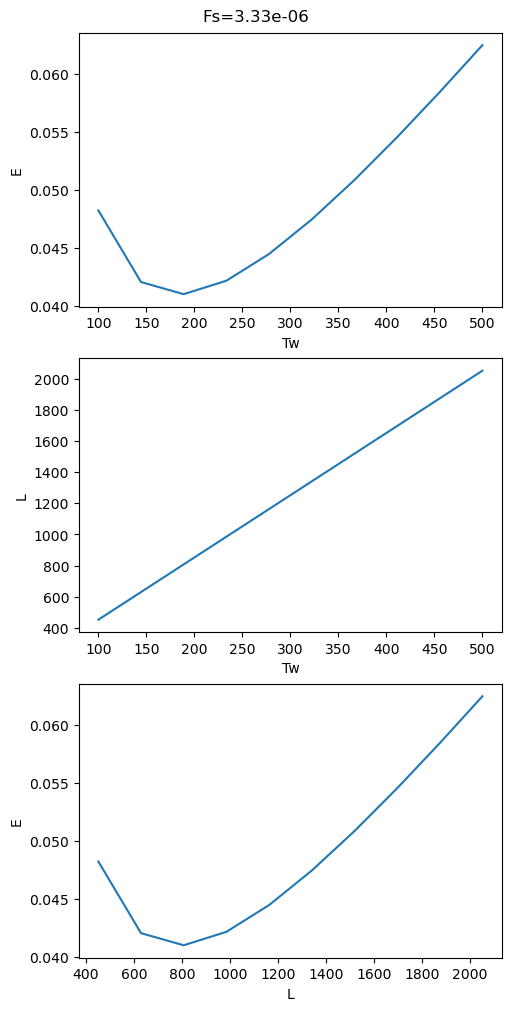

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls, Es)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


# Fs - second

In [30]:
Fs   = 1.0/(60*30*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms
Fs

5.555555555555555e-07

In [31]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

(3.5500888115199998,
 1.7777777777777777e-05,
 0.00033901333333333336,
 4.0,
 52.048)

In [32]:
Es1 = []
Ls1 = []
Tws = []
for Tw in np.linspace(Tw_min, Tw_max, 10):
    Tws.append(Tw)
    Es1.append(E(Tw))
    Ls1.append(L(Tw))

Text(0, 0.5, 'E')

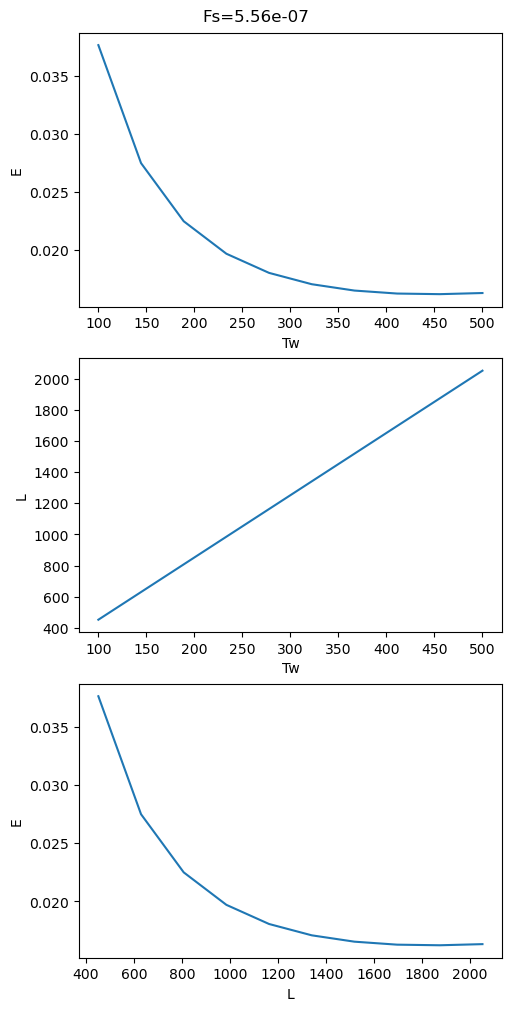

In [33]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es1)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls1)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls1, Es1)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


# Fs - third

In [34]:
Fs   = 1.0/(30*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms
Fs

3.3333333333333335e-05

In [35]:
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

alpha1, alpha2, alpha3, beta1, beta2

(3.5553286911999997, 0.0010666666666666667, 0.020340800000000006, 4.0, 52.048)

In [36]:
Es2 = []
Ls2 = []
Tws = []
for Tw in np.linspace(Tw_min, Tw_max, 10):
    Tws.append(Tw)
    Es2.append(E(Tw))
    Ls2.append(L(Tw))

Text(0, 0.5, 'E')

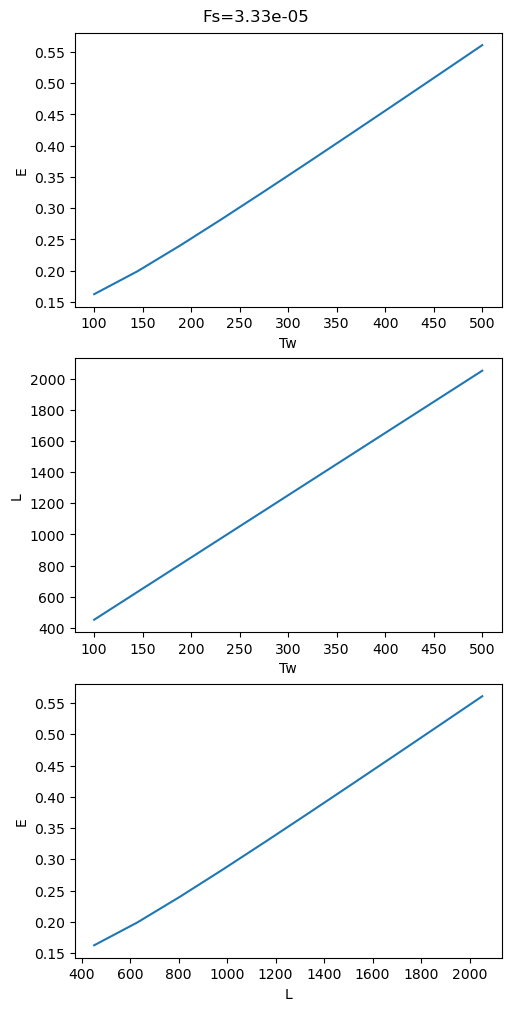

In [37]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es2)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls2)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls2, Es2)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')


In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(5,10), constrained_layout=True)
#fig.tight_layout()

#I wanted to create a big image so we can put it in the report, but we can stich the ones we already created and it would be perfect too.

fig.suptitle(f'Fs={Fs:.2e}')

axs[0].plot(Tws, Es2)
axs[0].set_xlabel('Tw')
axs[0].set_ylabel('E')

axs[1].plot(Tws, Ls2)
axs[1].set_xlabel('Tw')
axs[1].set_ylabel('L')


axs[2].plot(Ls2, Es2)
axs[2].set_xlabel('L')
axs[2].set_ylabel('E')
